## Quality Control 1

In [1]:
import json 
import pandas as pd 
import numpy as np 
import math 
import itertools 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure 
from load_dataset import TimeSeries 

In [2]:
# True labels
annotations = pd.read_json('TCPD-master/annotations.json')
annotations[['quality_control_1']]

,quality_control_1
6,[143]
7,[144]
8,[144]
9,[146]
10,NaN
12,[144]
13,NaN
14,NaN


In [3]:
# List true changepoints
annotator_df = pd.read_json('TCPD-master/annotations.json') 
qc1_df = annotator_df[['ozone']] 
list2d = np.array(qc1_df).flatten() 
list2d = [l for l in list2d if (type(l)==list)] 
qc1_annotation_lst = list(itertools.chain.from_iterable(list2d))
qc1_annotation_lst

[28, 28, 28, 14, 28]

t         int64
V1      float64
date     object
dtype: object


<Figure size 960x480 with 0 Axes>

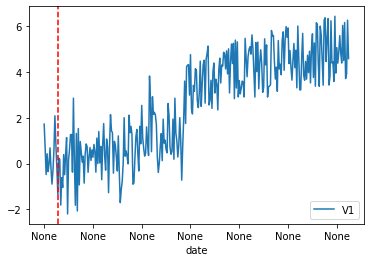

In [4]:
# Plot true changepoints
from load_dataset import TimeSeries
ts = TimeSeries.from_json('TCPD-master/datasets/quality_control_1/quality_control_1.json')
qc1_df = ts.df
qc1_df['date'] =ts.datestr
print(qc1_df.dtypes)
figure(figsize=(12, 6), dpi=80)
qc1_df.plot('date', 'V1')
qc1_df['is_CPD'] = np.where(qc1_df.t.isin(qc1_annotation_lst), 1,0)
plt.axvline(qc1_df.loc[qc1_df['is_CPD']==1][['t']].values[0], color='red', linestyle='--')

In [16]:
qc1_df[146:147]

,t,V1,date,is_CPD,time
146,146,4.221149,1846-01-01,0,1846-01-01


In [11]:
n = range(1700, 2013)
qc1_df['date'] = n
qc1_df
qc1_df.date = pd.to_datetime(df.date, format='%Y')

In [12]:
qc1_df

,t,V1,date,is_CPD,time
0,0,1.718969,1700-01-01,0,1970-01-01 00:00:00.000001700
1,1,0.691285,1701-01-01,0,1970-01-01 00:00:00.000001701
2,2,-0.476868,1702-01-01,0,1970-01-01 00:00:00.000001702
3,3,0.427788,1703-01-01,0,1970-01-01 00:00:00.000001703
4,4,-0.348268,1704-01-01,0,1970-01-01 00:00:00.000001704
...,...,...,...,...,...
308,308,6.144980,2008-01-01,0,1970-01-01 00:00:00.000002008
309,309,3.704967,2009-01-01,0,1970-01-01 00:00:00.000002009
310,310,3.914936,2010-01-01,0,1970-01-01 00:00:00.000002010
311,311,6.248957,2011-01-01,0,1970-01-01 00:00:00.000002011


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ax/core/parameter.py:467: UserWarning:

`sort_values` is not specified for `ChoiceParameter` "known_prec_multiplier". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ax/core/parameter.py:467: UserWarning:

`sort_values` is not specified for `ChoiceParameter` "cp_prior". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.



total changepoints-->  1


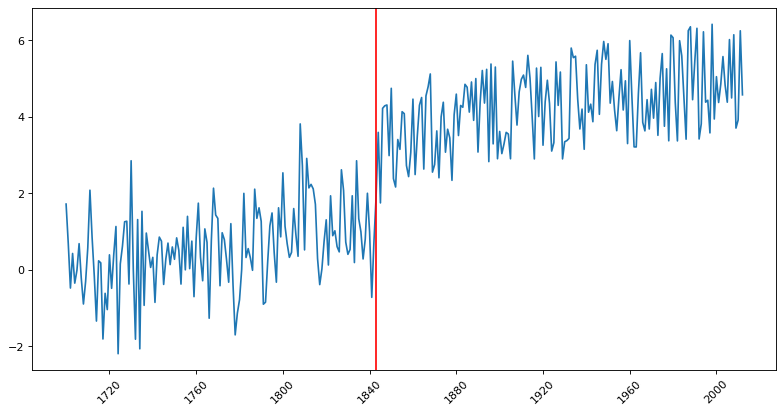

In [14]:
from kats.detectors.bocpd import BOCPDetector, BOCPDModelType, TrendChangeParameters
from kats.consts import TimeSeriesData

df = qc1_df
df['time']= pd.to_datetime(df['date'])


tsd = TimeSeriesData(df.loc[:,['time','V1']])

# Initialize the detector
detector = BOCPDetector(tsd)


changepoints = detector.detector(
    model=BOCPDModelType.NORMAL_KNOWN_MODEL, # this is the default choice
    #model_parameters=[known_prec_multiplier=1.0]
    lag=10,
    changepoint_prior=.5,#prior belief
    threshold=.5
)

print('total changepoints--> ', len(changepoints))

figure(figsize=(12, 6), dpi=80)
# Plot the data
plt.xticks(rotation=45)
detector.plot(changepoints)
plt.show()

In [17]:
changepoints

[(TimeSeriesChangePoint(start_time: 1843-01-01T00:00:00.000000000, end_time: 1843-01-01T00:00:00.000000000, confidence: 0.6221731798745173),
  <kats.detectors.bocpd.BOCPDMetadata at 0x7f921266fe20>)]

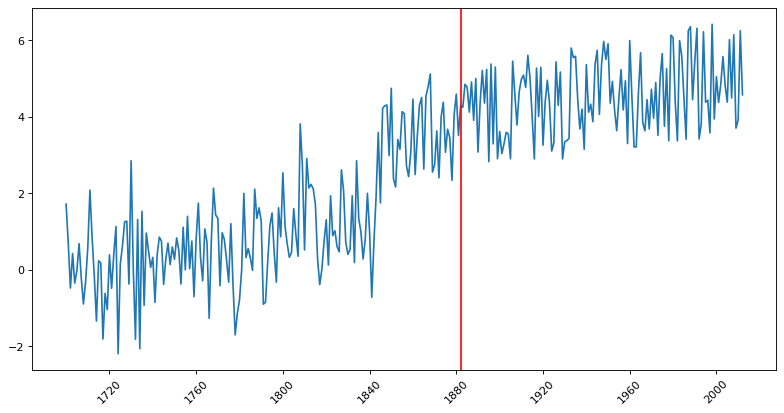

In [20]:
#Robust Stat Detector
from kats.detectors.robust_stat_detection import RobustStatDetector

detector = RobustStatDetector(tsd)
change_points = detector.detector(comparison_window=50, smoothing_window_size=50, p_value_cutoff=0.05)
figure(figsize=(12, 6), dpi=80)
plt.xticks(rotation=45)
detector.plot(change_points)
plt.show()

In [21]:
change_points

[(TimeSeriesChangePoint(start_time: 1882-01-01T00:00:00.000000000, end_time: 1882-01-01T00:00:00.000000000, confidence: 0.9555455064370147),
  <kats.detectors.robust_stat_detection.RobustStatMetadata at 0x7f9213248df0>)]

total changepoints-->  1


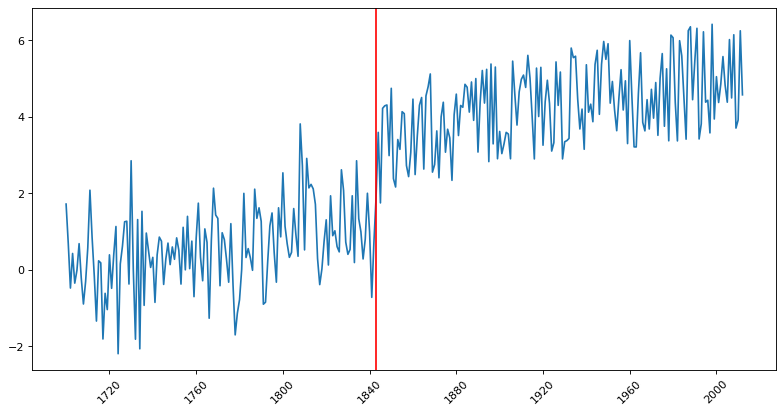

In [22]:
# CUSUM
from kats.detectors.cusum_detection import CUSUMDetector


# Initialize the detector
detector = CUSUMDetector(tsd)

change_points = detector.detector(threshold=0.05)

print('total changepoints--> ', len(change_points))

figure(figsize=(12, 6), dpi=80)
# Plot the data
plt.xticks(rotation=45)
detector.plot(change_points)
plt.show()

In [23]:
change_points

[(TimeSeriesChangePoint(start_time: 1843-01-01 00:00:00, end_time: 1843-01-01 00:00:00, confidence: 1.0),
  <kats.detectors.cusum_detection.CUSUMMetadata at 0x7f921343a760>)]

#### Annotation -> 1846
#### BOCPD -> 1843
#### RobustStatDetector -> 1882
#### CUSUM -> 1843